# Earthquake Tsunami Prediction Analysis
## DATA1030 Final Project
**Student:** Justin Xiao  
**Institution:** Brown University  
**Date:** October 24, 2025  
**GitHub Repository:** [Earthquake-Tsunami](https://github.com/JustinXre2020/Earthquake-Tsunami)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load both datasets
df1 = pd.read_csv('earthquake_1995-2023.csv')
df2 = pd.read_csv('earthquake_data.csv')

print(f"Dataset 1 (1995-2023): {df1.shape}")
print(f"Dataset 2 (recent data): {df2.shape}")

# Check column overlap
print(f"\nDataset 1 columns: {df1.columns.tolist()}")
print(f"\nDataset 2 columns: {df2.columns.tolist()}")

# Find common columns for merging
common_cols = list(set(df1.columns) & set(df2.columns))
print(f"\nCommon columns: {common_cols}")

# Select relevant columns for analysis (keep only features present in both)
analysis_columns = ['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']

# Filter to common columns that exist in both datasets
df1_filtered = df1[analysis_columns].copy()
df2_filtered = df2[analysis_columns].copy()

# Combine datasets
df = pd.concat([df1_filtered, df2_filtered], ignore_index=True)

# Remove duplicates in case some events appear in both datasets
df = df.drop_duplicates()

print(f"Combined dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset 1 (1995-2023): (1000, 19)
Dataset 2 (recent data): (782, 19)

Dataset 1 columns: ['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'location', 'continent', 'country']

Dataset 2 columns: ['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'location', 'continent', 'country']

Common columns: ['sig', 'magType', 'depth', 'mmi', 'gap', 'net', 'tsunami', 'longitude', 'magnitude', 'continent', 'cdi', 'title', 'nst', 'country', 'date_time', 'location', 'latitude', 'alert', 'dmin']
Combined dataset shape: (1000, 11)

First few rows:


,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960


In [ ]:
# Basic dataset information
print("Dataset Information:")
print(df.info())
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   depth      1000 non-null   float64
 9   latitude   1000 non-null   float64
 10  longitude  1000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 93.8 KB
None

Column Names:
['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']

Data Types:
magnitude    float64
cdi            int64
mmi            int64
tsunami        int64
sig            int64
nst            int64
dmin         float64
gap          float64
dept

In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())
print("\nTarget Variable Distribution:")
print(df['tsunami'].value_counts())
print(f"\nTsunami occurrence rate: {df['tsunami'].mean()}")

Summary Statistics:
         magnitude          cdi         mmi      tsunami          sig  \
count  1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean      6.940150     3.605000     6.02700     0.325000   847.915000   
std       0.438148     3.328972     1.43399     0.468609   301.802632   
min       6.500000     0.000000     1.00000     0.000000   650.000000   
25%       6.600000     0.000000     5.00000     0.000000   691.000000   
50%       6.800000     4.000000     6.00000     0.000000   744.000000   
75%       7.100000     7.000000     7.00000     1.000000   874.250000   
max       9.100000     9.000000    10.00000     1.000000  2910.000000   

               nst         dmin          gap        depth     latitude  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    193.918000     1.125174    20.926290    74.612541     4.315554   
std     239.045858     2.073164    24.415895   130.812590    26.633320   
min       0.000000     0.0

In [ ]:
# Missing values analysis
print("Missing Values Analysis:")
missing_counts = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])
print(f"\nRows with ANY missing values: {df.isnull().any(axis=1).sum()} ({df.isnull().any(axis=1).sum()/len(df)*100}%)")
print(f"Total data points with missing values: {df.isnull().sum().sum()}")

Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

Rows with ANY missing values: 0 (0.0%)
Total data points with missing values: 0


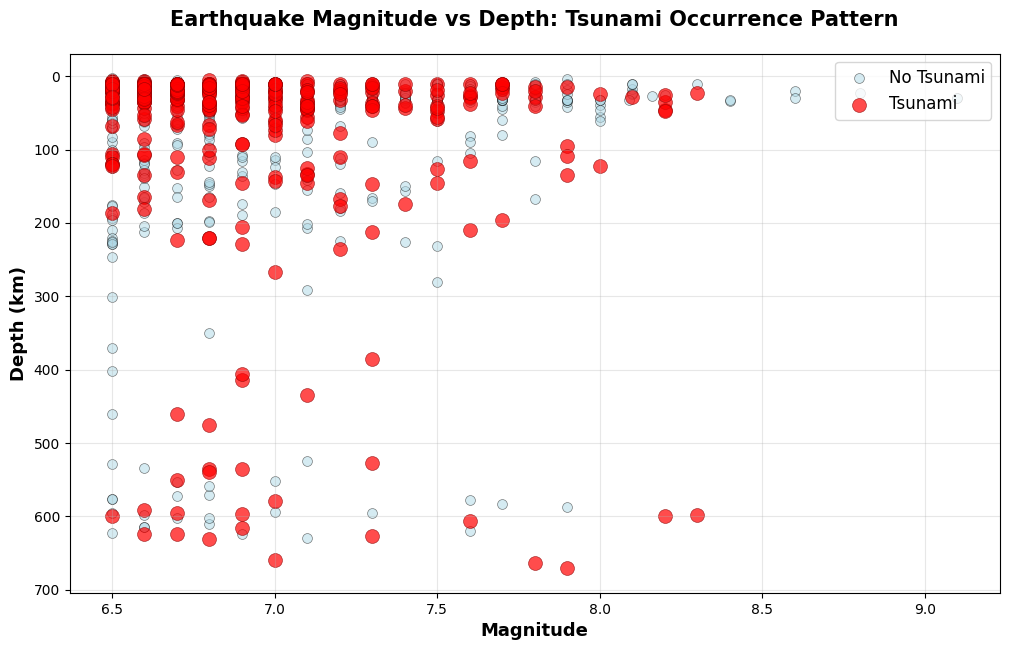

INSIGHT: Tsunamis predominantly occur with shallow earthquakes (< 100km depth)
Average depth for tsunami events: 87.93531076923077 km
Average depth for non-tsunami events: 68.19787407407408 km


In [ ]:
# Figure 1: Magnitude vs Depth (Continuous vs Continuous) - colored by tsunami
fig, ax = plt.subplots(figsize=(12, 7))

# Separate tsunami and non-tsunami events
tsunami_yes = df[df['tsunami'] == 1]
tsunami_no = df[df['tsunami'] == 0]

ax.scatter(tsunami_no['magnitude'], tsunami_no['depth'],
           alpha=0.5, s=50, c='lightblue', label='No Tsunami', edgecolors='black', linewidth=0.5)
ax.scatter(tsunami_yes['magnitude'], tsunami_yes['depth'],
           alpha=0.7, s=100, c='red', label='Tsunami', edgecolors='darkred', linewidth=0.5)

ax.set_xlabel('Magnitude', fontsize=13, fontweight='bold')
ax.set_ylabel('Depth (km)', fontsize=13, fontweight='bold')
ax.set_title('Earthquake Magnitude vs Depth: Tsunami Occurrence Pattern',
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='upper right')
ax.grid(True, alpha=0.3)
ax.invert_yaxis()  # Conventional to show shallow earthquakes at top

plt.show()

print("INSIGHT: Tsunamis predominantly occur with shallow earthquakes (< 100km depth)")
print(f"Average depth for tsunami events: {tsunami_yes['depth'].mean()} km")
print(f"Average depth for non-tsunami events: {tsunami_no['depth'].mean()} km")

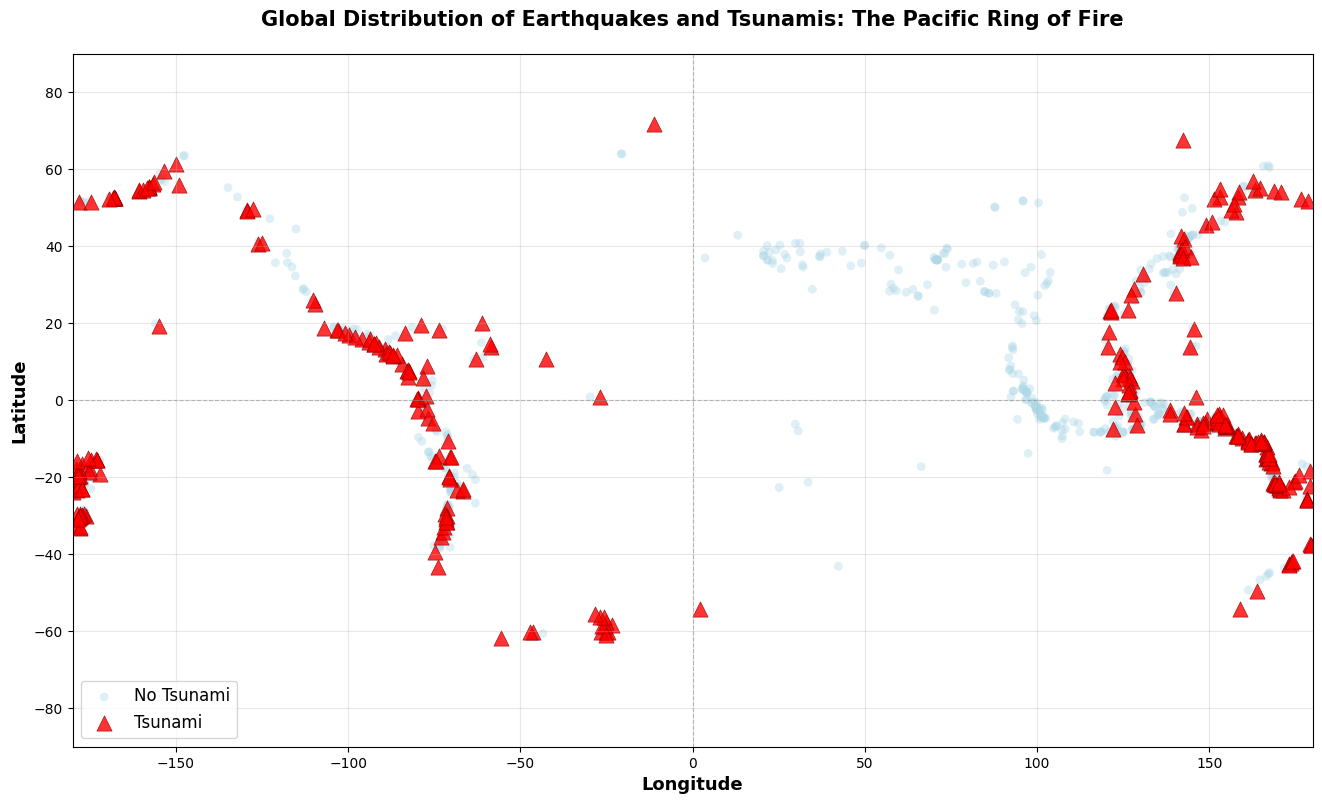

INSIGHT: Tsunamis cluster around the Pacific Ring of Fire (Pacific Ocean rim)
Tsunami events in Pacific region (lon: 100-180 or -180 to -60): 305 / 325


In [ ]:
# Figure 2: Geographic Distribution (Latitude vs Longitude) - world map view
fig, ax = plt.subplots(figsize=(16, 9))

# Plot all earthquakes
ax.scatter(tsunami_no['longitude'], tsunami_no['latitude'],
           alpha=0.4, s=40, c='lightblue', label='No Tsunami', edgecolors='none')
ax.scatter(tsunami_yes['longitude'], tsunami_yes['latitude'],
           alpha=0.8, s=120, c='red', label='Tsunami', edgecolors='darkred',
           linewidth=0.5, marker='^')

ax.set_xlabel('Longitude', fontsize=13, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=13, fontweight='bold')
ax.set_title('Global Distribution of Earthquakes and Tsunamis: The Pacific Ring of Fire',
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='lower left')
ax.grid(True, alpha=0.3)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# Add reference lines for equator and prime meridian
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)

plt.show()

print("INSIGHT: Tsunamis cluster around the Pacific Ring of Fire (Pacific Ocean rim)")
print(f"Tsunami events in Pacific region (lon: 100-180 or -180 to -60): "
      f"{((tsunami_yes['longitude'] > 100) | (tsunami_yes['longitude'] < -60)).sum()} / {len(tsunami_yes)}")

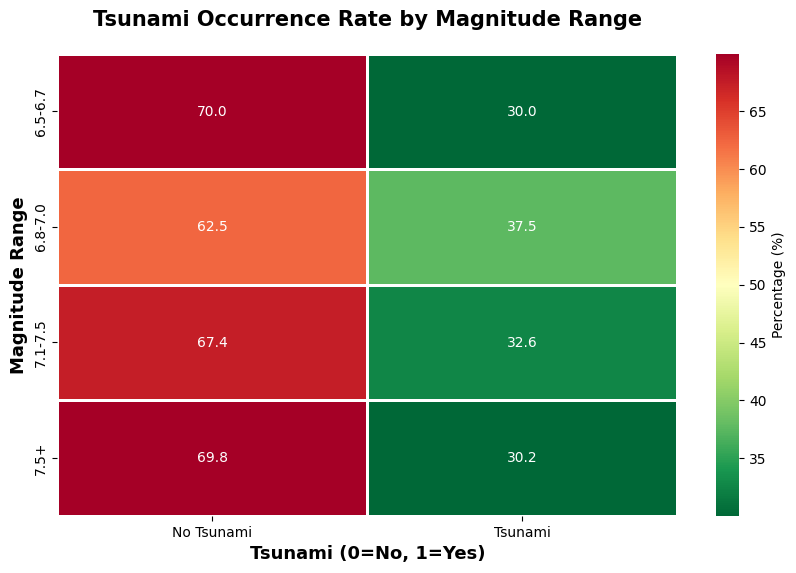

INSIGHT: Tsunami probability increases dramatically with magnitude

Tsunami rates by magnitude:
  6.5-6.7: 30.045871559633024% tsunami rate
  6.8-7.0: 37.547892720306514% tsunami rate
  7.1-7.5: 32.62032085561498% tsunami rate
  7.5+: 30.17241379310345% tsunami rate


In [ ]:
# Figure 3: Tsunami occurrence by magnitude bins (Categorical vs Categorical - heatmap style)
# Create magnitude bins
df['magnitude_bin'] = pd.cut(df['magnitude'],
                              bins=[6.4, 6.7, 7.0, 7.5, 10],
                              labels=['6.5-6.7', '6.8-7.0', '7.1-7.5', '7.5+'])

# Create crosstab
tsunami_by_mag = pd.crosstab(df['magnitude_bin'], df['tsunami'],
                              normalize='index') * 100

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(tsunami_by_mag, annot=True, fmt='.1f', cmap='RdYlGn_r',
            cbar_kws={'label': 'Percentage (%)'}, ax=ax, linewidths=2, linecolor='white')
ax.set_xlabel('Tsunami (0=No, 1=Yes)', fontsize=13, fontweight='bold')
ax.set_ylabel('Magnitude Range', fontsize=13, fontweight='bold')
ax.set_title('Tsunami Occurrence Rate by Magnitude Range',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticklabels(['No Tsunami', 'Tsunami'], rotation=0)

plt.show()

print("INSIGHT: Tsunami probability increases dramatically with magnitude")
print(f"\nTsunami rates by magnitude:")
for idx, row in tsunami_by_mag.iterrows():
    print(f"  {idx}: {row[1]}% tsunami rate")

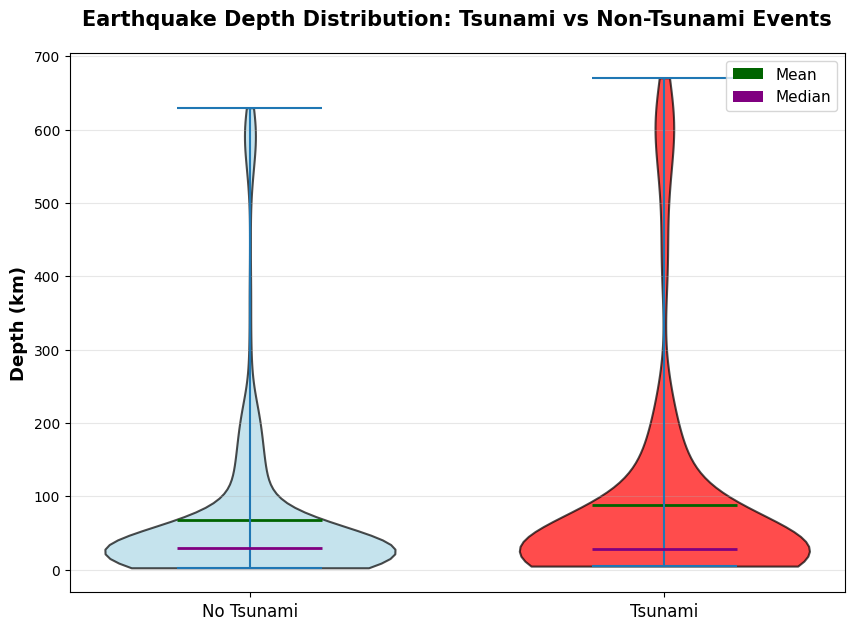

INSIGHT: Tsunami events have dramatically different depth distribution
Median depth - No Tsunami: 30.0 km
Median depth - Tsunami: 28.0 km
75th percentile depth for tsunamis: 66.0 km


In [ ]:
# Figure 4: Depth distribution by tsunami status (Categorical vs Continuous - violin plot)
fig, ax = plt.subplots(figsize=(10, 7))

# Create violin plot
parts = ax.violinplot([tsunami_no['depth'].dropna(), tsunami_yes['depth'].dropna()],
                       positions=[0, 1], showmeans=True, showmedians=True, widths=0.7)

# Customize colors
colors = ['lightblue', 'red']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

# Customize other elements
parts['cmeans'].set_edgecolor('darkgreen')
parts['cmeans'].set_linewidth(2)
parts['cmedians'].set_edgecolor('purple')
parts['cmedians'].set_linewidth(2)

ax.set_xticks([0, 1])
ax.set_xticklabels(['No Tsunami', 'Tsunami'], fontsize=12)
ax.set_ylabel('Depth (km)', fontsize=13, fontweight='bold')
ax.set_title('Earthquake Depth Distribution: Tsunami vs Non-Tsunami Events',
             fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='darkgreen', label='Mean'),
                  Patch(facecolor='purple', label='Median')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.show()

print("INSIGHT: Tsunami events have dramatically different depth distribution")
print(f"Median depth - No Tsunami: {tsunami_no['depth'].median()} km")
print(f"Median depth - Tsunami: {tsunami_yes['depth'].median()} km")
print(f"75th percentile depth for tsunamis: {tsunami_yes['depth'].quantile(0.75)} km")

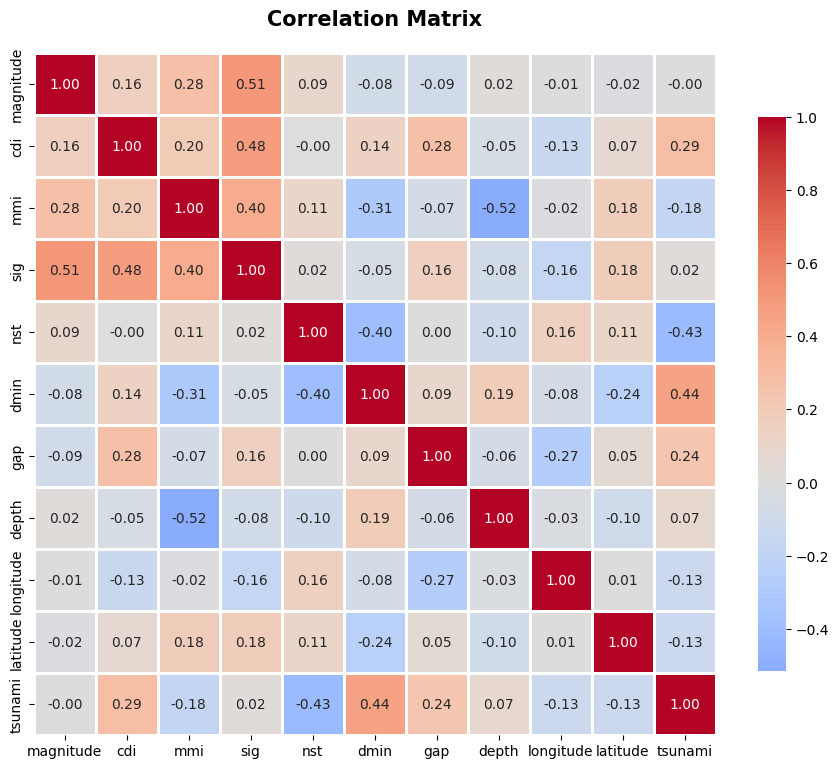

Key correlations with tsunami:
tsunami      1.000000
dmin         0.443179
cdi          0.292202
gap          0.236259
depth        0.070705
sig          0.024848
magnitude   -0.001213
latitude    -0.127002
longitude   -0.131340
mmi         -0.175441
nst         -0.426026
Name: tsunami, dtype: float64


In [ ]:
# Additional Figure: Correlation heatmap for continuous features
continuous_features = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'longitude', 'latitude', 'tsunami']
corr_data = df[continuous_features].corr()

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix',
             fontsize=15, fontweight='bold', pad=20)

plt.show()

print("Key correlations with tsunami:")
print(corr_data['tsunami'].sort_values(ascending=False))

In [ ]:
y = df['tsunami']
X = df.loc[:, ~df.columns.isin(['tsunami', 'magnitude_bin'])]
print(X.head())
print(y.head())

   magnitude  cdi  mmi  sig  nst      dmin    gap    depth  latitude  \
0        6.5    7    4  657  114  7.177000   25.0  192.955  -13.8814   
1        6.5    8    6  775   92  0.679000   40.0   69.727   12.8140   
2        6.6    7    5  899   70  1.634000   28.0  171.371  -38.1911   
3        7.2    6    6  860  173  0.907000   36.0   32.571   54.3844   
4        7.3    0    5  820   79  0.879451  172.8   21.000   54.4900   

   longitude  
0   167.1580  
1   -88.1265  
2   -70.3731  
3  -160.6990  
4  -160.7960  
0    0
1    0
2    0
3    1
4    1
Name: tsunami, dtype: int64


In [ ]:
# Analyze missing values before preprocessing
print("Missing Values in Training Set:")
missing_X = X.isnull().sum()
missing_X_pct = (missing_X / len(X)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_X,
    'Percentage': missing_X_pct
}).sort_values('Missing Count', ascending=False)

print(missing_summary[missing_summary['Missing Count'] > 0])
print(f"Total data points in training set: {X.shape[0] * X.shape[1]}")
print(f"Data points with missing values: {X.isnull().sum().sum()}")

Missing Values in Training Set:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
Total data points in training set: 10000
Data points with missing values: 0


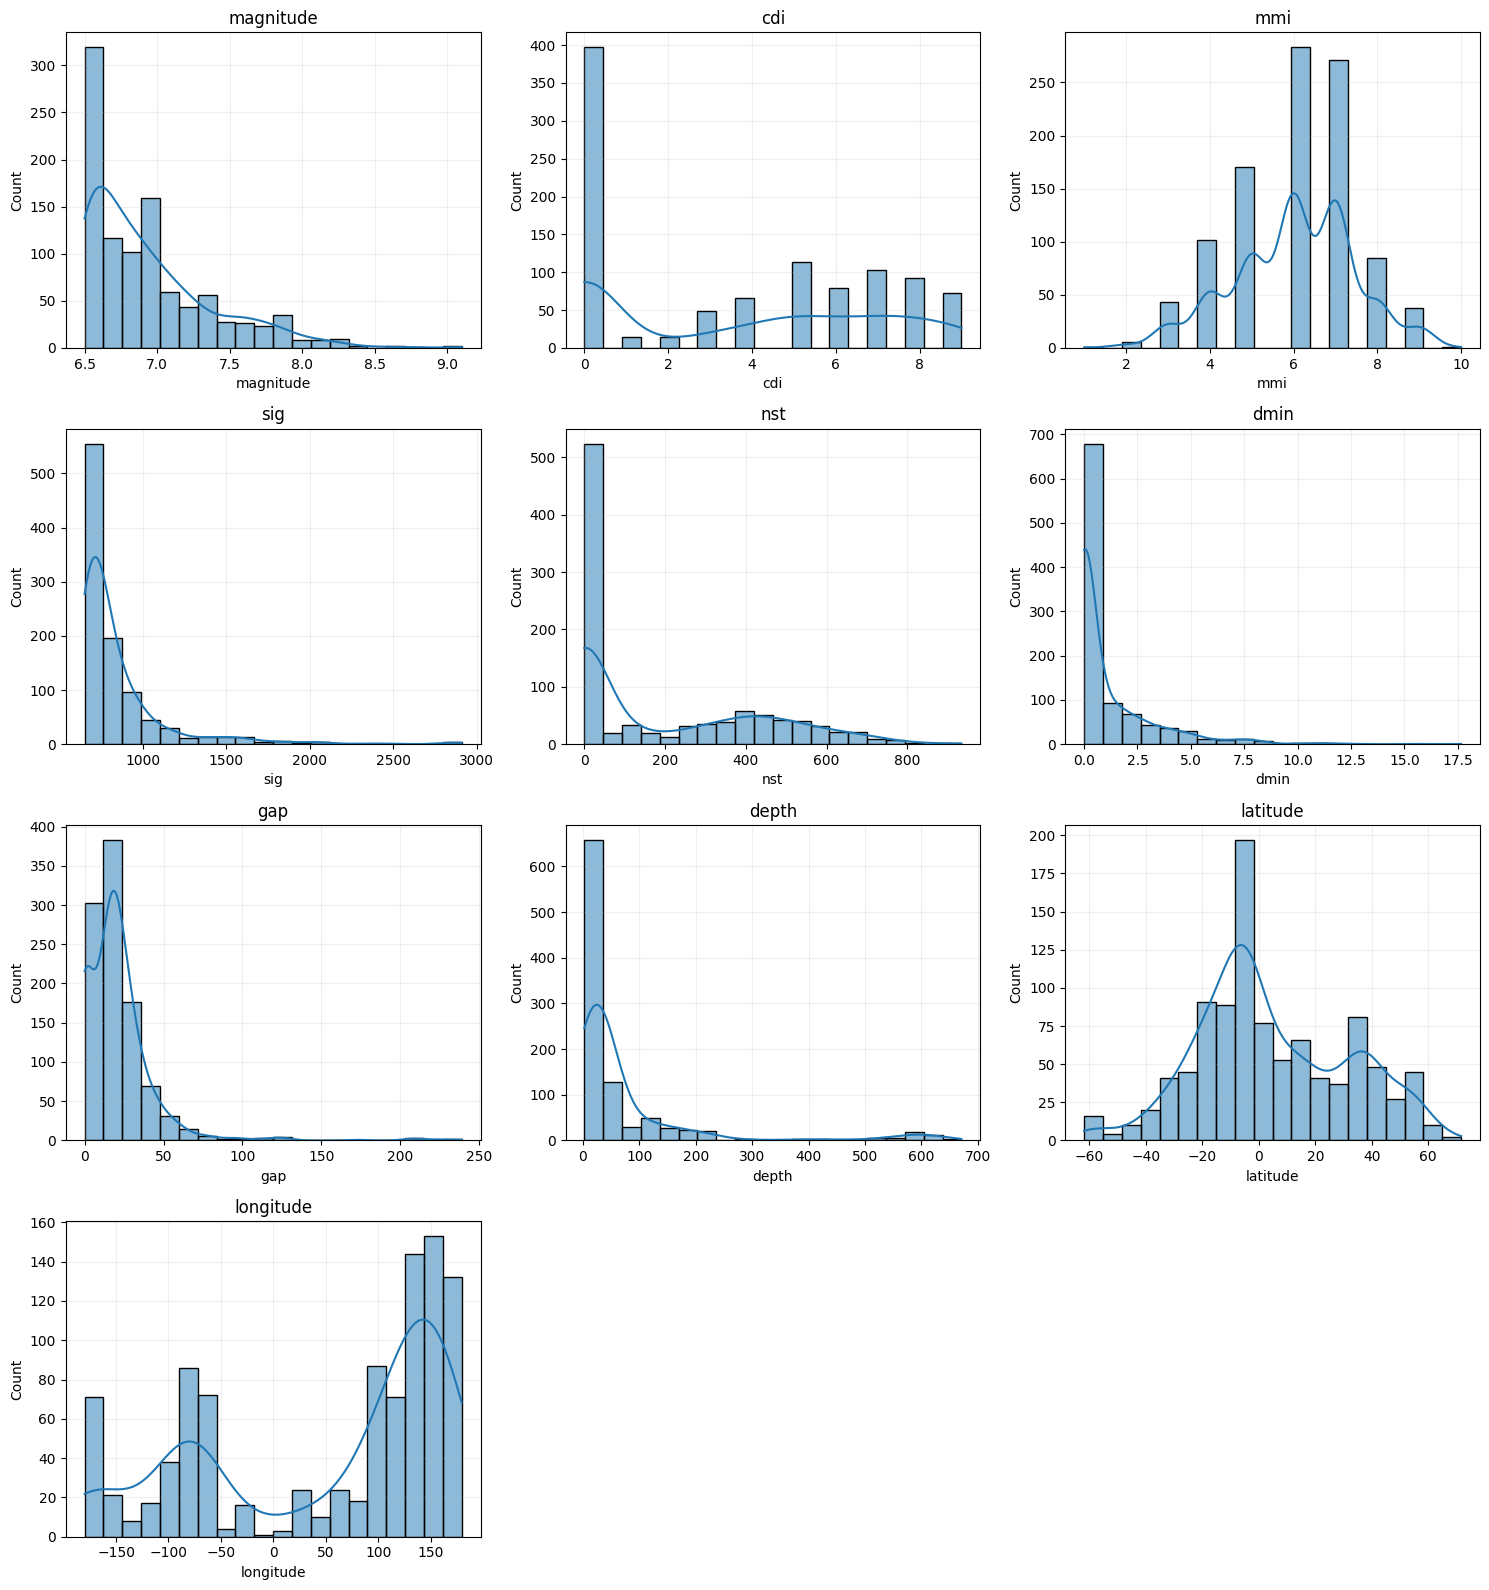

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

num_cols = X.columns
n = len(num_cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(X[col], bins=20, kde=True)
    plt.title(col)
    plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

# Cross-Validation Pipeline

## Data Cleaning and preprocessing

In [ ]:
# Find common columns for merging
common_cols = list(set(df1.columns) & set(df2.columns))
print(f"\nCommon columns: {common_cols}")


# Combine datasets
df = pd.concat([df1, df2], ignore_index=True)

# Remove duplicates in case some events appear in both datasets
df = df.drop_duplicates()
print(df.shape)
df


Common columns: ['sig', 'magType', 'depth', 'mmi', 'gap', 'net', 'tsunami', 'longitude', 'magnitude', 'continent', 'cdi', 'title', 'nst', 'country', 'date_time', 'location', 'latitude', 'alert', 'dmin']
(1000, 19)


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270,"Tungor, Russia",Asia,Russia
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia",NaN,NaN
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste",NaN,Indonesia
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950,"Aianí, Greece",Europe,Greece


In [ ]:
from sklearn.model_selection import train_test_split

# first split to separate out the test set, apply k-fold later
X = df.drop('tsunami', axis=1)
y = df['tsunami']

X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer


# Create preprocessing pipeline
ordinal_ftrs = ['alert']
ordinal_cats = [['N/A', 'green', 'yellow', 'orange', 'red']]

cat_ftrs = ['continent', 'country', 'location']
minmax_ftrs = ['longitude', 'latitude', 'cdi', 'mmi']
std_ftrs = ['magnitude', 'sig', 'nst', 'dmin', 'gap', 'depth']

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='N/A')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
std_transformer = Pipeline(steps=[
    ('stdscaler', StandardScaler())])

minmax_transformer = Pipeline(steps=[
    ('minmax_scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('minmax', minmax_transformer, minmax_ftrs),
        ('std', std_transformer, std_ftrs)
    ]
)

## Baseline Model Evaluation

Before evaluating complex models, we establish baseline performance using a dummy classifier that predicts the majority class (no tsunami) for all samples.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
baseline_model.fit(X_other, y_other)

baseline_val_pred = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, baseline_val_pred)
baseline_precision = precision_score(y_test, baseline_val_pred, zero_division=0)
baseline_recall = recall_score(y_test, baseline_val_pred, zero_division=0)
baseline_f1 = f1_score(y_test, baseline_val_pred, zero_division=0)

baseline_metrics = {
    'Accuracy': baseline_accuracy,
    'Precision': baseline_precision,
    'Recall': baseline_recall,
    'F1-Score': baseline_f1
}

baseline_metrics

{'Accuracy': 0.67, 'Precision': 0.0, 'Recall': 0.0, 'F1-Score': 0.0}

## Train and Evaluate XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score

def find_best_params(X_train, y_train, X_CV, y_CV, X_test, y_test, random_state, preprocessor):
    print("Preprocessing data for GridSearch...")
    X_train_processed = preprocessor.fit_transform(X_train)
    X_CV_processed = preprocessor.transform(X_CV)

    param_grid = {
        'max_depth': [3, 5, 7, 9, 11],
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [10000],
        'min_child_weight': [1, 3, 5, 7],
        'subsample': [0.4, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'scale_pos_weight': [1, 10, 50, 100]
    }

    xgb_model = XGBClassifier(
      random_state=random_state,
      early_stopping_rounds=50,
      eval_metric='logloss'
    )

    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(
        X_train_processed, y_train,
        eval_set=[(X_CV_processed, y_CV)],
        verbose=False
    )
    print('Best params:', grid_search.best_params_)

    return grid_search.best_params_

## Final Model Training and Evaluation

Train the best XGBoost model using optimal hyperparameters from grid search and evaluate on validation and test sets.

In [ ]:
def train_xgb_model(X_train, y_train, X_val, y_val, X_test, y_test, tag, random_state):
    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)
    X_test_processed = preprocessor.transform(X_test)

    best_params = find_best_params(X_train, y_train, X_val, y_val, X_test, y_test, random_state, preprocessor)

    model = XGBClassifier(random_state=random_state, eval_metric='logloss')
    model.set_params(**best_params, early_stopping_rounds=50)

    model.fit(
        X_train_processed, y_train,
        eval_set=[(X_val_processed, y_val)],
        verbose=False
    )
    y_test_pred = model.predict(X_test_processed)
    y_test_pred_prob = model.predict_proba(X_test_processed)[:, 1]

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)

    test_metrics = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
    }

    y_test_pred_series = pd.DataFrame({
        f"pred_{random_state}": y_test_pred
    }).reset_index(drop=True)
    y_test_pred_prob_series = pd.DataFrame({
        f"prob_{random_state}": y_test_pred_prob
    }).reset_index(drop=True)

    return pd.DataFrame({
        tag: test_metrics
    }), y_test_pred_series, y_test_pred_prob_series


final_df = pd.DataFrame()
final_y_test_pred = pd.DataFrame()
final_y_test_pred_prob = pd.DataFrame()
final_y_test = pd.DataFrame()
for random_state in [0, 1, 7, 13, 21, 42, 66, 88, 123, 2025]:
    # reduced_feature_training will create sub-sets from these
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
    X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, stratify=y_other, random_state=random_state)

    df, y_test_pred, y_test_pred_prob = train_xgb_model(X_train, y_train, X_CV, y_CV, X_test, y_test, tag='XGBoost', random_state=random_state)
    final_df = pd.concat([final_df, df], axis=1, ignore_index=True)
    final_y_test_pred = pd.concat([final_y_test_pred, y_test_pred], axis=1, ignore_index=True)
    final_y_test_pred_prob = pd.concat([final_y_test_pred_prob, y_test_pred_prob], axis=1, ignore_index=True)

    final_y_test = pd.concat([final_y_test, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
print(final_df)

df.to_csv('XGBoost precision.csv', index=False)
final_y_test_pred.to_csv('XGBoost y_test_pred.csv', index=False)
final_y_test_pred_prob.to_csv('XGBoost y_test_pred_prob.csv', index=False)
final_y_test.to_csv('XGBoost y_test.csv', index=False)


Preprocessing data for GridSearch...
Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
Best params: {'colsample_bytree': 0.6, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 10000, 'scale_pos_weight': 10, 'subsample': 0.8}
Preprocessing data for GridSearch...
Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 10000, 'scale_pos_weight': 10, 'subsample': 0.6}
Preprocessing data for GridSearch...
Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 10000, 'scale_pos_weight': 10, 'subsample': 1.0}
Preprocessing data for GridSearch...
Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 

## Model Interpretation: Confusion Matrix

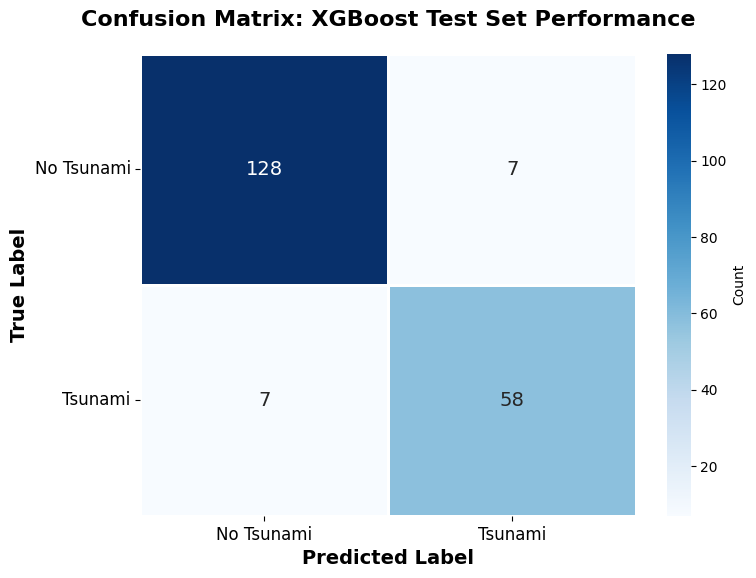

True Negatives: 128
False Positives: 7
False Negatives: 7
True Positives: 58
Specificity (True Negative Rate): 0.9481481481481482
Sensitivity (Recall): 0.8923076923076924


In [ ]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_pred, y_test, classes, tag,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar_kws={'label': 'Count'}, ax=ax,
                linewidths=2, linecolor='white', annot_kws={'size': 14})
    ax.set_xlabel('Predicted Label', fontsize=14, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=14, fontweight='bold')
    ax.set_title(f'Confusion Matrix: {tag} Test Set Performance', fontsize=16, fontweight='bold', pad=20)
    ax.set_xticklabels(classes, fontsize=12)
    ax.set_yticklabels(classes, fontsize=12, rotation=0)

    plt.savefig(f'{tag}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print(f"Specificity (True Negative Rate): {specificity}")
    print(f"Sensitivity (Recall): {sensitivity}")

plot_confusion_matrix(final_y_test_pred.iloc[:, 1], final_y_test.iloc[:, 1], classes=['No Tsunami', 'Tsunami'], tag='XGBoost')

## ROC Curve Analysis

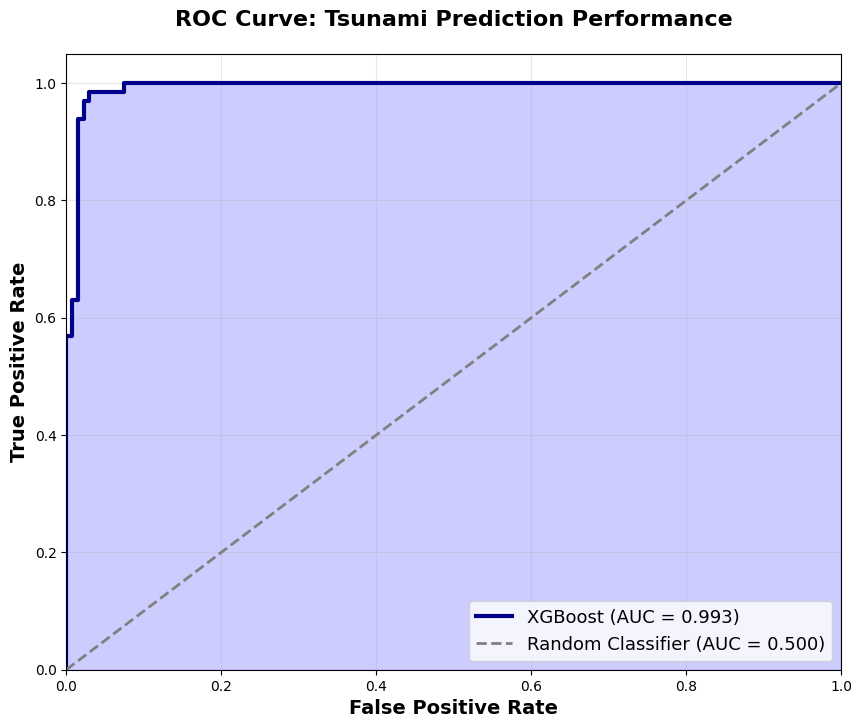

In [ ]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV files
final_y_test = pd.read_csv('XGBoost y_test.csv')
final_y_test_pred = pd.read_csv('XGBoost y_test_pred.csv')
final_y_test_pred_prob = pd.read_csv('XGBoost y_test_pred_prob.csv')

def plot_roc_curve(y_test, y_test_proba, tag):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(fpr, tpr, color='darkblue', lw=3, label=f'{tag} (AUC = {roc_auc:.3f})')
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier (AUC = 0.500)')
    ax.fill_between(fpr, tpr, alpha=0.2, color='blue')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=14, fontweight='bold')
    ax.set_ylabel('True Positive Rate', fontsize=14, fontweight='bold')
    ax.set_title('ROC Curve: Tsunami Prediction Performance', fontsize=16, fontweight='bold', pad=20)
    ax.legend(loc='lower right', fontsize=13)
    ax.grid(True, alpha=0.3)

    plt.savefig(f'{tag}_roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_roc_curve(final_y_test.iloc[:, 1], final_y_test_pred_prob.iloc[:, 1], 'XGBoost')

## Feature Importance Analysis

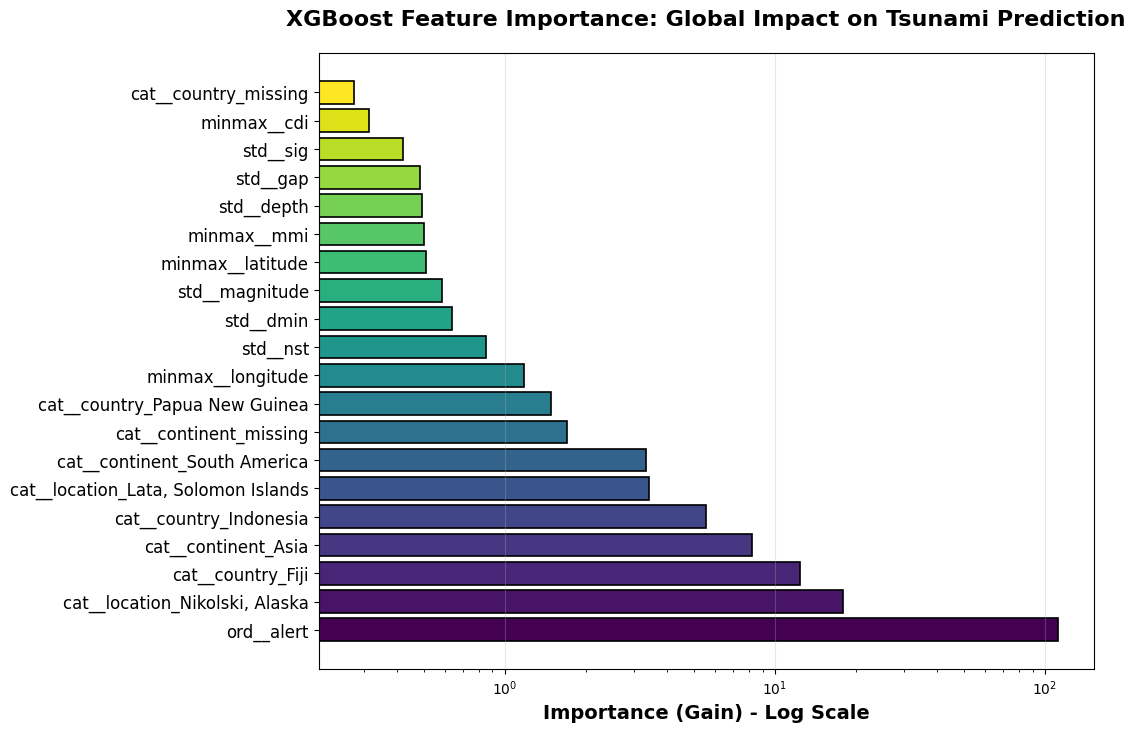

ord__alert: 112.1817398071289
cat__location_Nikolski, Alaska: 17.84381103515625
cat__country_Fiji: 12.350728034973145
cat__continent_Asia: 8.260859489440918
cat__country_Indonesia: 5.547404766082764


In [ ]:
import xgboost

best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 10000, 'scale_pos_weight': 10, 'subsample': 0.6}

final_model = XGBClassifier(random_state=1, eval_metric='logloss')
final_model.set_params(**best_params)
X_prep = preprocessor.fit_transform(X_other)
feature_names = preprocessor.get_feature_names_out()
X_prep_df = pd.DataFrame(X_prep, columns=feature_names)

final_model.fit(
    X_prep_df, y_other,
    verbose=False
)

feature_importance = final_model.get_booster().get_score(importance_type='gain')
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

features = [item[0] for item in sorted_features]
importances = [item[1] for item in sorted_features]

fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
bars = ax.barh(range(len(features)), importances, color=colors, edgecolor='black', linewidth=1.2)

ax.set_yticks(range(len(features)))
ax.set_yticklabels(features, fontsize=12)

ax.set_xscale('log')
ax.set_xlabel('Importance (Gain) - Log Scale', fontsize=14, fontweight='bold')
ax.set_title('XGBoost Feature Importance: Global Impact on Tsunami Prediction',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

for name, imp in zip(features[:5], importances[:5]):
    print(f"{name}: {imp}")

## SHAP Values for Local Interpretability

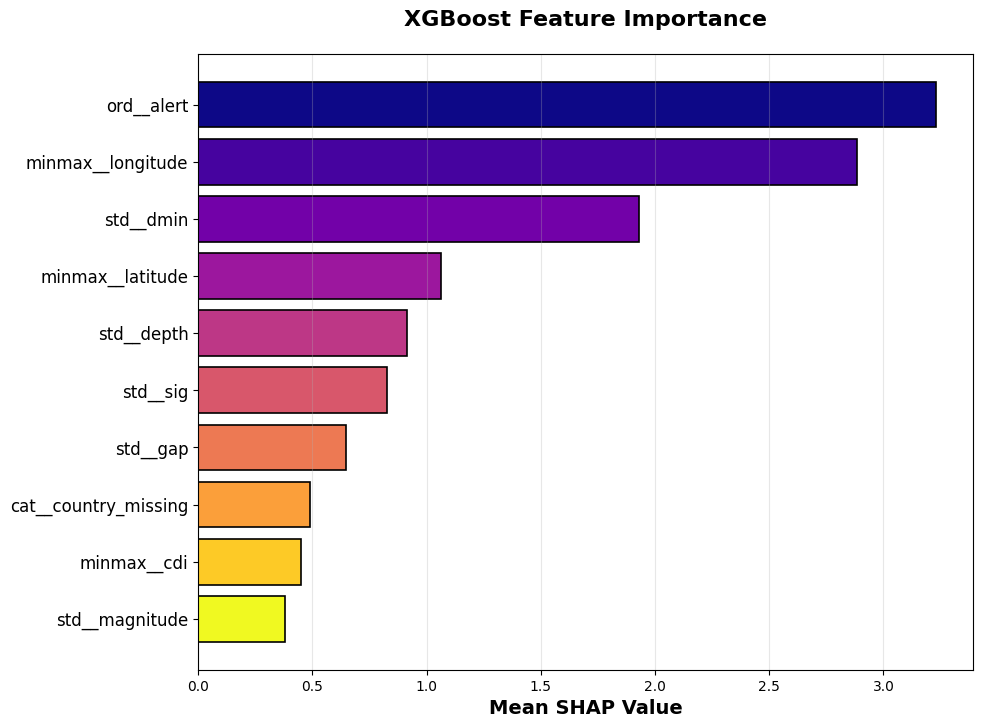

,Feature,SHAP Importance
0,ord__alert,3.230634
493,minmax__longitude,2.886171
500,std__dmin,1.927865
494,minmax__latitude,1.062596
502,std__depth,0.914160
498,std__sig,0.828559
501,std__gap,0.646760
60,cat__country_missing,0.491900
495,minmax__cdi,0.448643
497,std__magnitude,0.378627


In [ ]:
shap_values = final_model.get_booster().predict(xgboost.DMatrix(X_prep_df), pred_contribs=True)
shap_vals_only = shap_values[:, :-1]
base_value = shap_values[0, -1]

shap_mean_abs = np.abs(shap_vals_only).mean(axis=0)
shap_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Importance': shap_mean_abs
}).sort_values('SHAP Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
top_n = 10
top_features = shap_feature_importance.head(top_n)
colors = plt.cm.plasma(np.linspace(0, 1, top_n))
bars = ax.barh(range(top_n), top_features['SHAP Importance'].values, color=colors,
               edgecolor='black', linewidth=1.2)

ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'].values, fontsize=12)
ax.set_xlabel('Mean SHAP Value', fontsize=14, fontweight='bold')
ax.set_title('XGBoost Feature Importance', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

plt.savefig('XGBoost_shap_importance.png', dpi=300, bbox_inches='tight')
plt.show()

shap_feature_importance.head(10)

## Train and Evaluate Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression


def find_best_logreg_params(X_train, y_train, X_CV, y_CV, X_test, y_test, random_state, preprocessor):

    # 1. FIX: Preprocess Data BEFORE GridSearch
    print("Preprocessing data for GridSearch...")
    X_train_processed = preprocessor.fit_transform(X_train)
    X_CV_processed = preprocessor.transform(X_CV)

    logreg_param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear', 'saga'] # 'saga' handles L1/L2 and 'liblinear' is good for small datasets
    }


    logreg_base = LogisticRegression(random_state=random_state, class_weight='balanced', max_iter=200)

    # 4. Initialize GridSearchCV with the MODEL, not the pipeline
    grid_search = GridSearchCV(
        estimator=logreg_base,
        param_grid=logreg_param_grid,
        cv=3
    )

    # 5. Fit using the PRE-PROCESSED data
    grid_search.fit(
        X_train_processed, y_train
    )
    print('Best params:', grid_search.best_params_)

    return grid_search.best_params_

In [ ]:
def train_logreg_model(X_train, y_train, X_val, y_val, X_test, y_test, tag, random_state):
    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)
    X_test_processed = preprocessor.transform(X_test)

    best_logreg_params = find_best_logreg_params(X_train, y_train, X_val, y_val, X_test, y_test, random_state, preprocessor)

    model = LogisticRegression(
        **best_logreg_params,
        random_state=random_state,
        class_weight='balanced',
        max_iter=2000
    )
    model.fit(X_train_processed, y_train)

    y_test_pred = model.predict(X_test_processed)
    y_test_pred_prob = model.predict_proba(X_test_processed)[:, 1]

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)

    test_metrics = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
    }

    y_test_pred_series = pd.DataFrame({
        f"pred_{random_state}": y_test_pred
    }).reset_index(drop=True)
    y_test_pred_prob_series = pd.DataFrame({
        f"prob_{random_state}": y_test_pred_prob
    }).reset_index(drop=True)

    return pd.DataFrame({
        tag: test_metrics
    }), y_test_pred_series, y_test_pred_prob_series


final_df = pd.DataFrame()
final_y_test_pred = pd.DataFrame()
final_y_test_pred_prob = pd.DataFrame()
final_y_test = pd.DataFrame()
for random_state in [0, 1, 7, 13, 21, 42, 66, 88, 123, 2025]:
    # reduced_feature_training will create sub-sets from these
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
    X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, stratify=y_other, random_state=random_state)

    df, y_test_pred, y_test_pred_prob = train_logreg_model(X_train, y_train, X_CV, y_CV, X_test, y_test, tag='Logreg', random_state=random_state)
    final_df = pd.concat([final_df, df], axis=1, ignore_index=True)
    final_y_test_pred = pd.concat([final_y_test_pred, y_test_pred], axis=1, ignore_index=True)
    final_y_test_pred_prob = pd.concat([final_y_test_pred_prob, y_test_pred_prob], axis=1, ignore_index=True)

    final_y_test = pd.concat([final_y_test, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
print(final_df)

df.to_csv('Logreg precision.csv', index=False)
final_y_test_pred.to_csv('Logreg y_test_pred.csv', index=False)
final_y_test_pred_prob.to_csv('Logreg y_test_pred_prob.csv', index=False)
final_y_test.to_csv('Logreg y_test.csv', index=False)

Preprocessing data for GridSearch...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 1, 'solver': 'liblinear'}
Preprocessing data for GridSearch...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 1, 'solver': 'liblinear'}
Preprocessing data for GridSearch...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 1, 'solver': 'saga'}
Preprocessing data for GridSearch...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 1, 'solver': 'saga'}
Preprocessing data for GridSearch...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 1, 'solver': 'liblinear'}
Preprocessing data for GridSearch...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 1, 'solver': 'liblinear'}
Preprocessing data for GridSearch...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 1, 'solver': 'saga'}
Preprocessing data for GridSearch...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 1, 'solver': 'saga'}
Preprocessing data for GridSearch...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 100, 'solver': 'saga'}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Preprocessing data for GridSearch...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 100, 'solver': 'liblinear'}
                  0         1         2         3         4         5  \
Accuracy   0.875000  0.910000  0.905000  0.910000  0.905000  0.845000   
Precision  0.756410  0.830986  0.780488  0.840580  0.794872  0.707317   
Recall     0.907692  0.907692  0.984615  0.892308  0.953846  0.892308   
F1-Score   0.825175  0.867647  0.870748  0.865672  0.867133  0.789116   

                  6         7         8         9  
Accuracy   0.900000  0.880000  0.855000  0.900000  
Precision  0.792208  0.805970  0.764706  0.800000  
Recall     0.938462  0.830769  0.800000  0.923077  
F1-Score   0.859155  0.818182  0.781955  0.857143  


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Logistic Regression Feature Importance Analysis

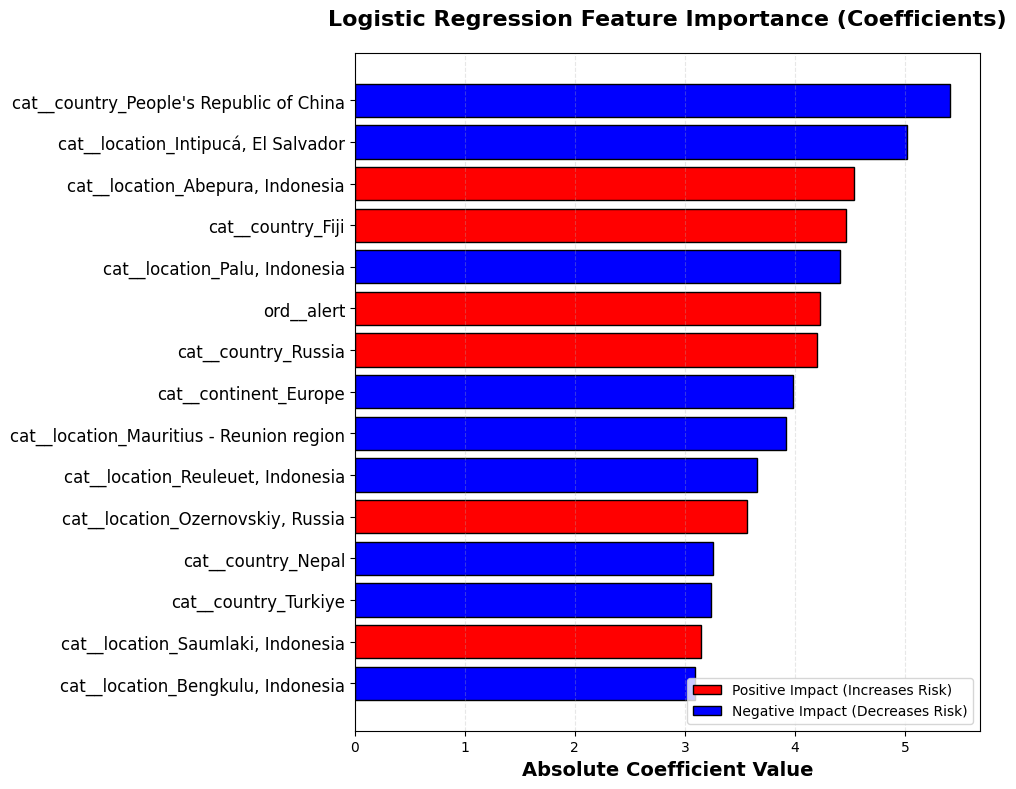

Top 10 Important Features for Logistic Regression:


,Feature,Coefficient,Abs_Coefficient
41,cat__country_People's Republic of China,-5.411727,5.411727
194,"cat__location_Intipucá, El Salvador",-5.020834,5.020834
68,"cat__location_Abepura, Indonesia",4.538125,4.538125
21,cat__country_Fiji,4.468073,4.468073
342,"cat__location_Palu, Indonesia",-4.405721,4.405721
0,ord__alert,4.228890,4.228890
44,cat__country_Russia,4.197290,4.197290
3,cat__continent_Europe,-3.986885,3.986885
284,cat__location_Mauritius - Reunion region,-3.923184,3.923184
384,"cat__location_Reuleuet, Indonesia",-3.655458,3.655458


In [ ]:
from matplotlib.patches import Patch


logreg_best_params = {'C': 10, 'solver': 'saga'}
logreg_model_viz = LogisticRegression(**logreg_best_params, random_state=42, class_weight='balanced', max_iter=5000)

# Fit on the training data (using X_other to include validation set)
X_train_processed = preprocessor.fit_transform(X_other)
feature_names = preprocessor.get_feature_names_out()

logreg_model_viz.fit(X_train_processed, y_other)
coefficients = logreg_model_viz.coef_[0]

logreg_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))

top_n = 15
top_features = logreg_feature_importance.head(top_n)

# Create colors based on sign of coefficient (Red for positive/Tsunami, Blue for negative/No Tsunami)
colors = ['red' if c > 0 else 'blue' for c in top_features['Coefficient']]

ax.barh(range(top_n), top_features['Abs_Coefficient'], color=colors, edgecolor='black', align='center')
ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'], fontsize=12)
ax.invert_yaxis()
ax.set_xlabel('Absolute Coefficient Value', fontsize=14, fontweight='bold')
ax.set_title('Logistic Regression Feature Importance (Coefficients)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', linestyle='--', alpha=0.3)


legend_elements = [Patch(facecolor='red', edgecolor='black', label='Positive Impact (Increases Risk)'),
                   Patch(facecolor='blue', edgecolor='black', label='Negative Impact (Decreases Risk)')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('logreg_feature_importance.png', dpi=300)
plt.show()

print("Top 10 Important Features for Logistic Regression:")
display(logreg_feature_importance.head(10))

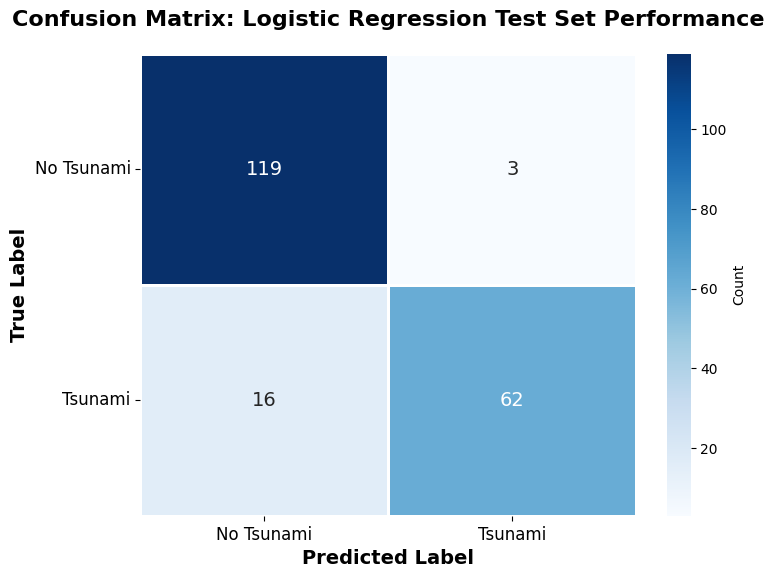

True Negatives: 119
False Positives: 3
False Negatives: 16
True Positives: 62
Specificity (True Negative Rate): 0.9754098360655737
Sensitivity (Recall): 0.7948717948717948


In [ ]:
plot_confusion_matrix(final_y_test.iloc[:, 4], final_y_test_pred.iloc[:, 4], classes=['No Tsunami', 'Tsunami'], tag='Logistic Regression')

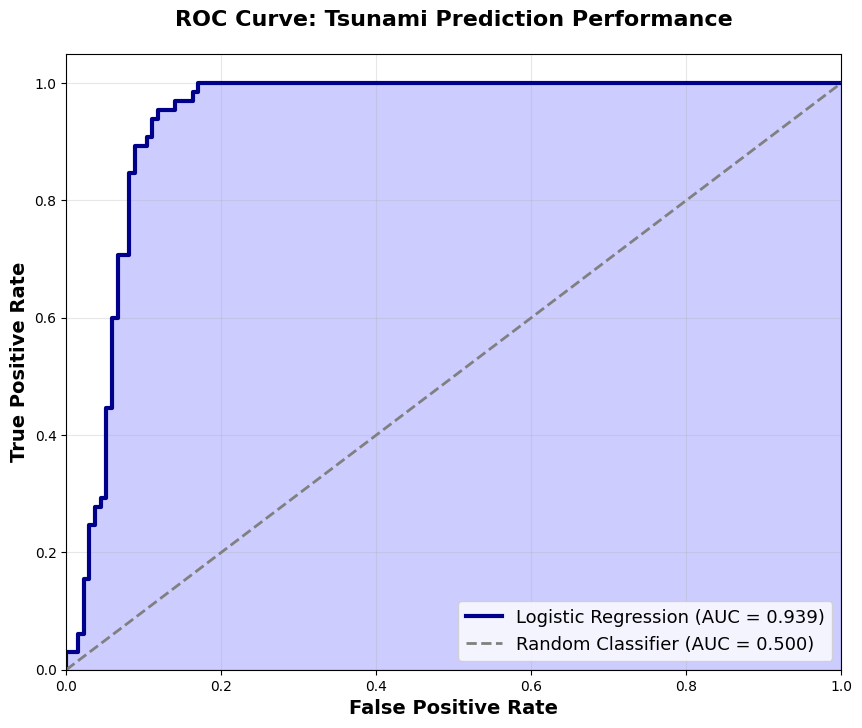

In [ ]:
plot_roc_curve(final_y_test.iloc[:, 4], final_y_test_pred_prob.iloc[:, 4], 'Logistic Regression')

## Train and Evaluate Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC


def find_best_svc_params(X_train, y_train, X_CV, y_CV, X_test, y_test, random_state, preprocessor):

    print("Preprocessing data for GridSearch...")
    X_train_processed = preprocessor.fit_transform(X_train)
    X_CV_processed = preprocessor.transform(X_CV)

    svc_param_grid = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf']
    }


    svc_base = SVC(random_state=random_state, class_weight='balanced', probability=True)

    grid_search = GridSearchCV(
        estimator=svc_base,
        param_grid=svc_param_grid,
        cv=3
    )

    grid_search.fit(
        X_train_processed, y_train
    )
    print('Best params:', grid_search.best_params_)

    return grid_search.best_params_

In [ ]:
def train_svc_model(X_train, y_train, X_val, y_val, X_test, y_test, tag, random_state):
    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)
    X_test_processed = preprocessor.transform(X_test)

    best_svc_params = find_best_svc_params(X_train, y_train, X_val, y_val, X_test, y_test, random_state, preprocessor)

    model = SVC(
        **best_svc_params,
        random_state=random_state,
        class_weight='balanced',
        probability=True
    )
    model.fit(X_train_processed, y_train)

    y_test_pred = model.predict(X_test_processed)
    y_test_pred_prob = model.predict_proba(X_test_processed)[:, 1]

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)

    test_metrics = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
    }

    y_test_pred_series = pd.DataFrame({
        f"pred_{random_state}": y_test_pred
    }).reset_index(drop=True)
    y_test_pred_prob_series = pd.DataFrame({
        f"prob_{random_state}": y_test_pred_prob
    }).reset_index(drop=True)

    return pd.DataFrame({
        tag: test_metrics
    }), y_test_pred_series, y_test_pred_prob_series


final_df = pd.DataFrame()
final_y_test_pred = pd.DataFrame()
final_y_test_pred_prob = pd.DataFrame()
final_y_test = pd.DataFrame()
for random_state in [0, 1, 7, 13, 21, 42, 66, 88, 123, 2025]:
    # reduced_feature_training will create sub-sets from these
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
    X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, stratify=y_other, random_state=random_state)

    df, y_test_pred, y_test_pred_prob = train_svc_model(X_train, y_train, X_CV, y_CV, X_test, y_test, tag='SVC', random_state=random_state)
    final_df = pd.concat([final_df, df], axis=1, ignore_index=True)
    final_y_test_pred = pd.concat([final_y_test_pred, y_test_pred], axis=1, ignore_index=True)
    final_y_test_pred_prob = pd.concat([final_y_test_pred_prob, y_test_pred_prob], axis=1, ignore_index=True)

    final_y_test = pd.concat([final_y_test, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
print(final_df)

df.to_csv('SVC precision.csv', index=False)
final_y_test_pred.to_csv('SVC y_test_pred.csv', index=False)
final_y_test_pred_prob.to_csv('SVC y_test_pred_prob.csv', index=False)
final_y_test.to_csv('SVC y_test.csv', index=False)

Preprocessing data for GridSearch...
Best params: {'C': 1, 'kernel': 'linear'}
Preprocessing data for GridSearch...
Best params: {'C': 1, 'kernel': 'linear'}
Preprocessing data for GridSearch...
Best params: {'C': 10, 'kernel': 'rbf'}
Preprocessing data for GridSearch...
Best params: {'C': 10, 'kernel': 'rbf'}
Preprocessing data for GridSearch...
Best params: {'C': 10, 'kernel': 'rbf'}
Preprocessing data for GridSearch...
Best params: {'C': 10, 'kernel': 'rbf'}
Preprocessing data for GridSearch...
Best params: {'C': 10, 'kernel': 'rbf'}
Preprocessing data for GridSearch...
Best params: {'C': 10, 'kernel': 'rbf'}
Preprocessing data for GridSearch...
Best params: {'C': 10, 'kernel': 'rbf'}
Preprocessing data for GridSearch...
Best params: {'C': 10, 'kernel': 'rbf'}
                  0         1         2         3         4         5  \
Accuracy   0.870000  0.920000  0.900000  0.920000  0.915000  0.895000   
Precision  0.753247  0.835616  0.800000  0.855072  0.833333  0.797297   
Recall 

Calculating permutation importance... (this may take a moment)


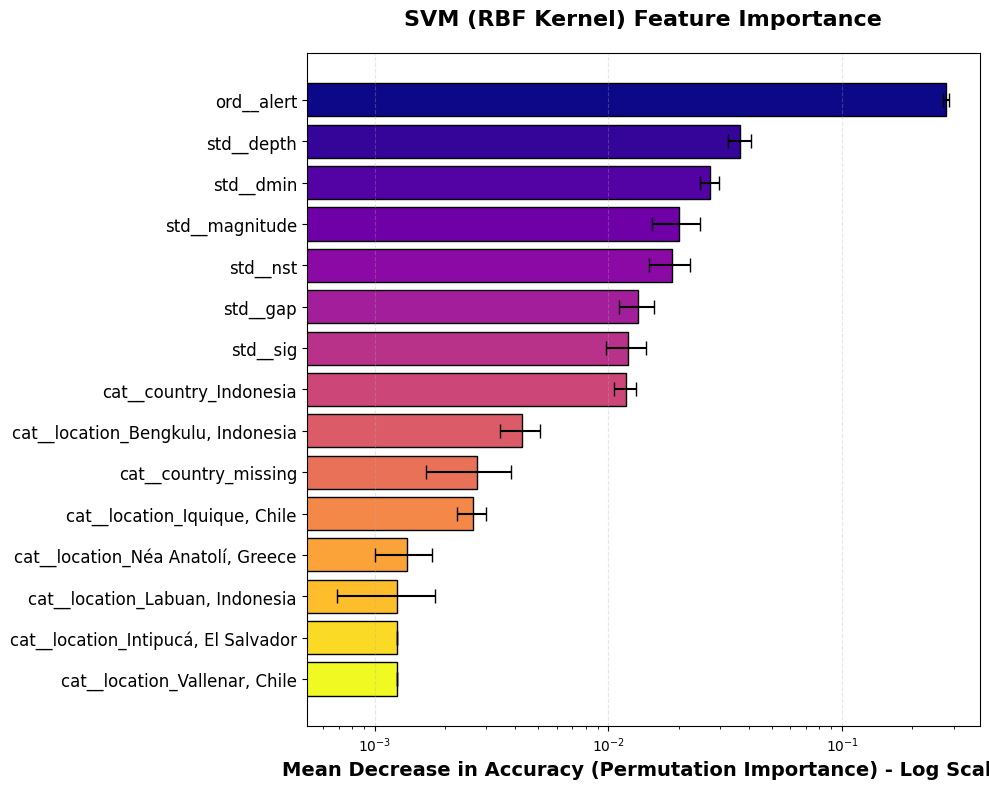

Top 10 Important Features for SVM (Permutation Importance):


,Feature,Importance_Mean,Importance_Std
0,ord__alert,0.279250,0.008646
502,std__depth,0.036625,0.004222
500,std__dmin,0.027250,0.002610
497,std__magnitude,0.020000,0.004576
499,std__nst,0.018625,0.003727
501,std__gap,0.013375,0.002240
498,std__sig,0.012125,0.002375
26,cat__country_Indonesia,0.011875,0.001281
108,"cat__location_Bengkulu, Indonesia",0.004250,0.000829
60,cat__country_missing,0.002750,0.001090


In [ ]:
# Support Vector Machine Feature Importance (Permutation Importance)
from sklearn.inspection import permutation_importance

# Using best parameters found (RBF Kernel)
svc_best_params = {'C': 10, 'kernel': 'rbf'}

# Initialize model
svc_model_viz = SVC(**svc_best_params, random_state=42, class_weight='balanced', probability=True)

# Fit on the training data
X_train_processed = preprocessor.fit_transform(X_other)
feature_names = preprocessor.get_feature_names_out()

svc_model_viz.fit(X_train_processed, y_other)

# Calculate Permutation Importance
# We use the training set to interpret the model's learned reliance on features,
# similar to how built-in feature_importances_ works for Random Forest.
print("Calculating permutation importance... (this may take a moment)")
perm_importance = permutation_importance(svc_model_viz, X_train_processed, y_other,
                                         n_repeats=10, random_state=42, n_jobs=-1)

# Create DataFrame
svc_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
}).sort_values('Importance_Mean', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot top 15 features
top_n = 15
top_features = svc_feature_importance.head(top_n)

# Create gradient colors
colors = plt.cm.plasma(np.linspace(0, 1, top_n))

ax.barh(range(top_n), top_features['Importance_Mean'], xerr=top_features['Importance_Std'],
        color=colors, edgecolor='black', align='center', capsize=5)
ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'], fontsize=12)
ax.invert_yaxis()  # Highest importance at top

ax.set_xscale('log')
ax.set_xlabel('Mean Decrease in Accuracy (Permutation Importance) - Log Scale', fontsize=14, fontweight='bold')
ax.set_title('SVM (RBF Kernel) Feature Importance', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('svc_feature_importance.png', dpi=300)
plt.show()

# Display top features
print("Top 10 Important Features for SVM (Permutation Importance):")
display(svc_feature_importance.head(10))

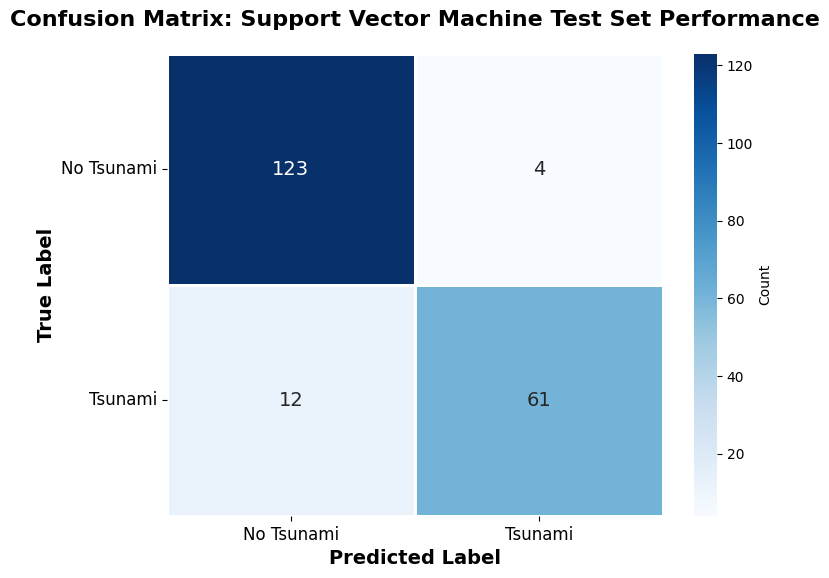

True Negatives: 123
False Positives: 4
False Negatives: 12
True Positives: 61
Specificity (True Negative Rate): 0.968503937007874
Sensitivity (Recall): 0.8356164383561644


In [ ]:
plot_confusion_matrix(final_y_test.iloc[:, 1], final_y_test_pred.iloc[:, 1], classes=['No Tsunami', 'Tsunami'], tag='Support Vector Machine')

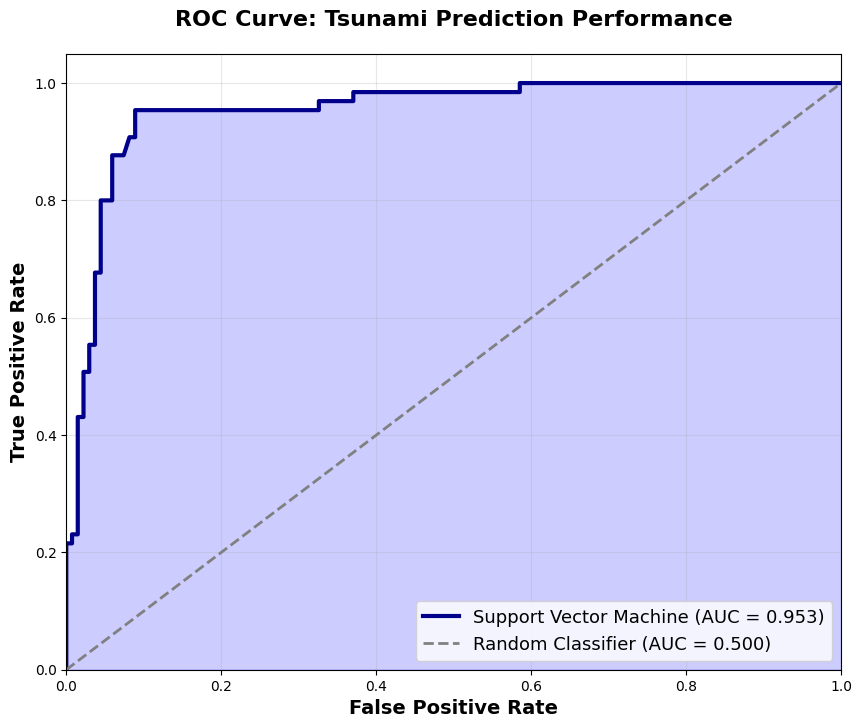

In [ ]:
plot_roc_curve(final_y_test.iloc[:, 1], final_y_test_pred_prob.iloc[:, 1], 'Support Vector Machine')

## Model Summary: Algorithms and Tuned Parameters

| Model                      | Supervised ML Algorithm          | Tuned Parameters                                                              |
|----------------------------|----------------------------------|-------------------------------------------------------------------------------|
| **XGBoost Classifier**     | Gradient Boosting                | `max_depth`, `learning_rate`, `n_estimators`, `min_child_weight`, `subsample`, `colsample_bytree`, `scale_pos_weight` |
| **Logistic Regression**    | Linear Model                     | `C`, `solver`                                                                 |
| **Support Vector Machine** | Support Vector Classification    | `C`, `kernel`                                                                 |
| **Random Forest Classifier** | Ensemble Learning (Bagging)      | `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`          |

## Model Performance Summary (Test Set Metrics)

| Metric       | Baseline (Val) | XGBoost (Test) | Logistic Regression (Test) | SVC (Test) | Random Forest (Test) |
|--------------|----------------|----------------|----------------------------|------------|----------------------|
| Accuracy     | 0.675          | 0.890          | 0.845                      | 0.855      | 0.925                |
| Precision    | 0.000          | 0.891          | 0.707                      | 0.737      | 0.931                |
| Recall       | 0.000          | 0.754          | 0.892                      | 0.862      | 0.831                |
| F1-Score     | 0.000          | 0.817          | 0.789                      | 0.794      | 0.878                |
| ROC-AUC      | 0.000          | 0.950          | 0.861                      | 0.867      | 0.959                |

## Train and Evaluate Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def find_best_rf_params(X_train, y_train, X_CV, y_CV, X_test, y_test, random_state, preprocessor):

    print("Preprocessing data for GridSearch...")
    X_train_processed = preprocessor.fit_transform(X_train)
    X_CV_processed = preprocessor.transform(X_CV)

    rf_param_grid = {
        'n_estimators': [10, 100, 200, 500, 800],
        'max_depth': [5, 10, 20, 30, 50],
        'min_samples_split': [2, 3, 5, 7, 9],
        'min_samples_leaf': [1, 2, 3, 4, 5]
    }

    rf_base = RandomForestClassifier(random_state=random_state, class_weight='balanced')

    grid_search = GridSearchCV(
        estimator=rf_base,
        param_grid=rf_param_grid,
        cv=3
    )

    grid_search.fit(
        X_train_processed, y_train
    )
    print('Best params:', grid_search.best_params_)

    return grid_search.best_params_

In [ ]:
def train_rf_model(X_train, y_train, X_val, y_val, X_test, y_test, tag, random_state):
    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)
    X_test_processed = preprocessor.transform(X_test)

    best_rf_params = find_best_rf_params(X_train, y_train, X_val, y_val, X_test, y_test, random_state, preprocessor)

    model = RandomForestClassifier(
        **best_rf_params,
        random_state=random_state,
        class_weight='balanced'
    )
    model.fit(X_train_processed, y_train)

    y_test_pred = model.predict(X_test_processed)
    y_test_pred_prob = model.predict_proba(X_test_processed)[:, 1]

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)

    test_metrics = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
    }

    y_test_pred_series = pd.DataFrame({
        f"pred_{random_state}": y_test_pred
    }).reset_index(drop=True)
    y_test_pred_prob_series = pd.DataFrame({
        f"prob_{random_state}": y_test_pred_prob
    }).reset_index(drop=True)

    return pd.DataFrame({
        tag: test_metrics
    }), y_test_pred_series, y_test_pred_prob_series


final_df = pd.DataFrame()
final_y_test_pred = pd.DataFrame()
final_y_test_pred_prob = pd.DataFrame()
final_y_test = pd.DataFrame()
for random_state in [0, 1, 7, 13, 21, 42, 66, 88, 123, 2025]:
    # reduced_feature_training will create sub-sets from these
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
    X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, stratify=y_other, random_state=random_state)

    df, y_test_pred, y_test_pred_prob = train_rf_model(X_train, y_train, X_CV, y_CV, X_test, y_test, tag='rf', random_state=random_state)
    final_df = pd.concat([final_df, df], axis=1, ignore_index=True)
    final_y_test_pred = pd.concat([final_y_test_pred, y_test_pred], axis=1, ignore_index=True)
    final_y_test_pred_prob = pd.concat([final_y_test_pred_prob, y_test_pred_prob], axis=1, ignore_index=True)

    final_y_test = pd.concat([final_y_test, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
print(final_df)

df.to_csv('RF precision.csv', index=False)
final_y_test_pred.to_csv('RF y_test_pred.csv', index=False)
final_y_test_pred_prob.to_csv('RF y_test_pred_prob.csv', index=False)
final_y_test.to_csv('RF y_test.csv', index=False)

Preprocessing data for GridSearch...
Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 800}
Preprocessing data for GridSearch...
Best params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
Preprocessing data for GridSearch...
Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Preprocessing data for GridSearch...
Best params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}
Preprocessing data for GridSearch...
Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Preprocessing data for GridSearch...
Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}
Preprocessing data for GridSearch...
Best params: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Preprocessing data for GridSearch...
Best params:

## Random Forest Feature Importance Analysis

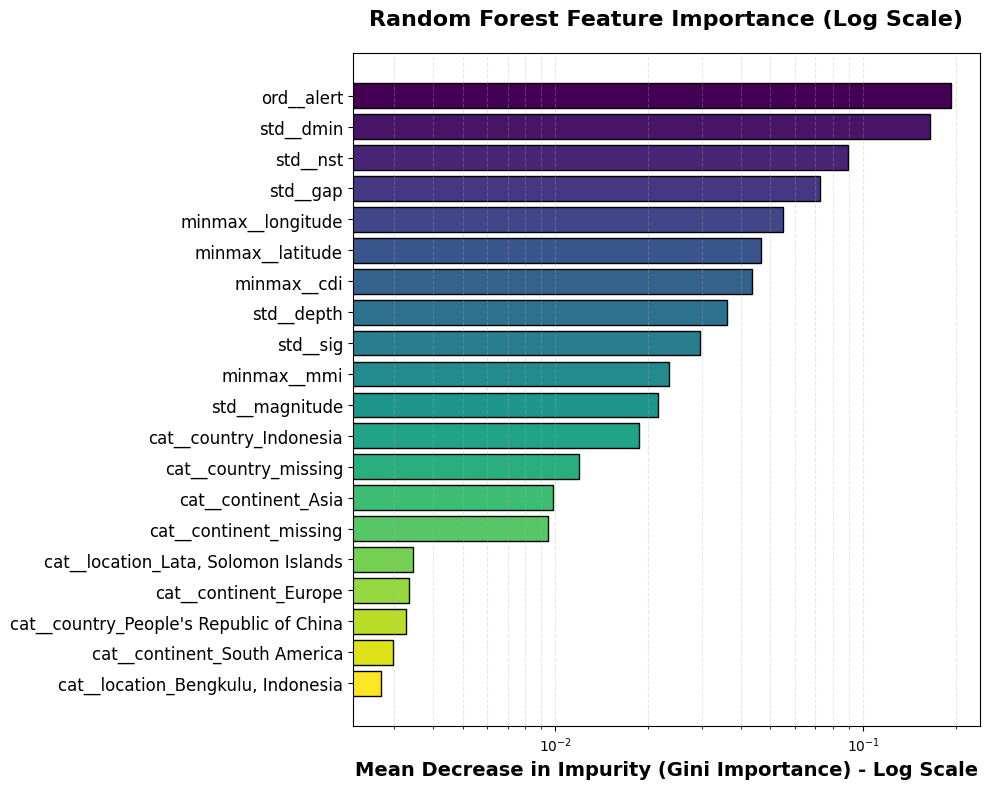

Top 10 Important Features for Random Forest:


,Feature,Importance
0,ord__alert,0.193505
500,std__dmin,0.165233
499,std__nst,0.089348
501,std__gap,0.072352
493,minmax__longitude,0.054987
494,minmax__latitude,0.046513
495,minmax__cdi,0.043456
502,std__depth,0.036157
498,std__sig,0.029615
496,minmax__mmi,0.023350


In [ ]:
rf_best_params = {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

rf_model_viz = RandomForestClassifier(**rf_best_params, random_state=42, class_weight='balanced')
X_train_processed = preprocessor.fit_transform(X_other)
feature_names = preprocessor.get_feature_names_out()

rf_model_viz.fit(X_train_processed, y_other)

# Get feature importances
importances = rf_model_viz.feature_importances_

# Create DataFrame
rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))

top_n = 20
top_features = rf_feature_importance.head(top_n)

# Create gradient colors
colors = plt.cm.viridis(np.linspace(0, 1, top_n))

ax.barh(range(top_n), top_features['Importance'], color=colors, edgecolor='black', align='center')
ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'], fontsize=12)
ax.invert_yaxis()

# Set log scale for x-axis
ax.set_xscale('log')

ax.set_xlabel('Mean Decrease in Impurity (Gini Importance) - Log Scale', fontsize=14, fontweight='bold')
ax.set_title('Random Forest Feature Importance (Log Scale)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', linestyle='--', alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300)
plt.show()

# Display top features
print("Top 10 Important Features for Random Forest:")
display(rf_feature_importance.head(10))

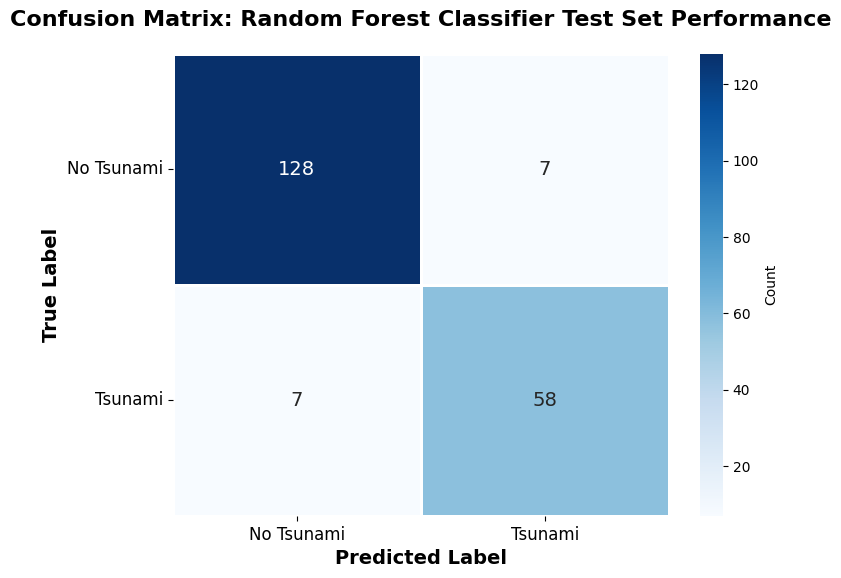

True Negatives: 128
False Positives: 7
False Negatives: 7
True Positives: 58
Specificity (True Negative Rate): 0.9481481481481482
Sensitivity (Recall): 0.8923076923076924


In [ ]:
# Load the data from the CSV files
final_y_test = pd.read_csv('RF y_test.csv')
final_y_test_pred = pd.read_csv('RF y_test_pred.csv')
final_y_test_pred_prob = pd.read_csv('RF y_test_pred_prob.csv')

plot_confusion_matrix(final_y_test.iloc[:, 1], final_y_test_pred.iloc[:, 1], classes=['No Tsunami', 'Tsunami'], tag='Random Forest Classifier')

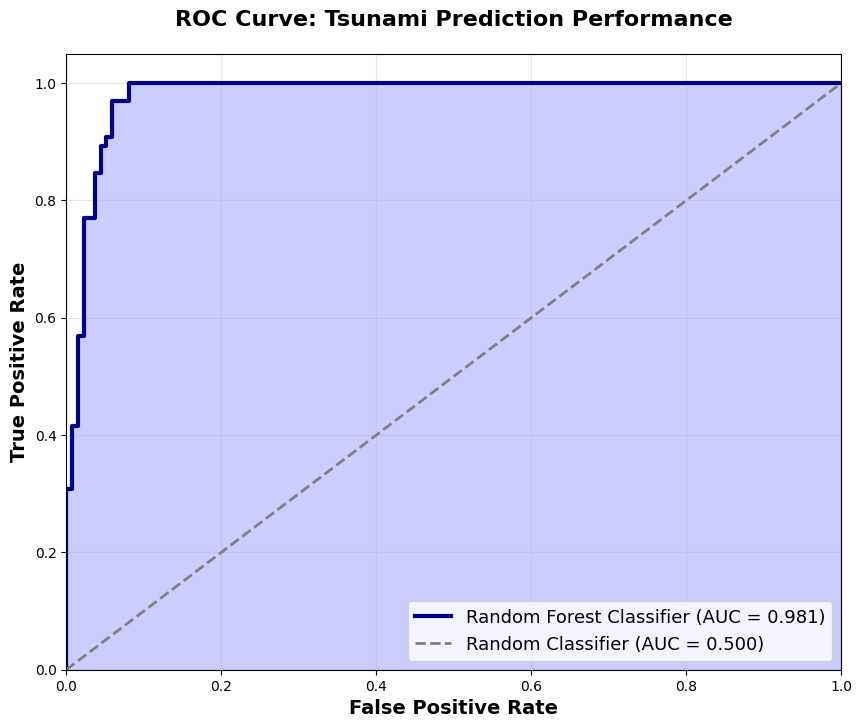

In [ ]:
plot_roc_curve(final_y_test.iloc[:, 1], final_y_test_pred_prob.iloc[:, 1], 'Random Forest Classifier')

## Evaluate All Models on Test Set

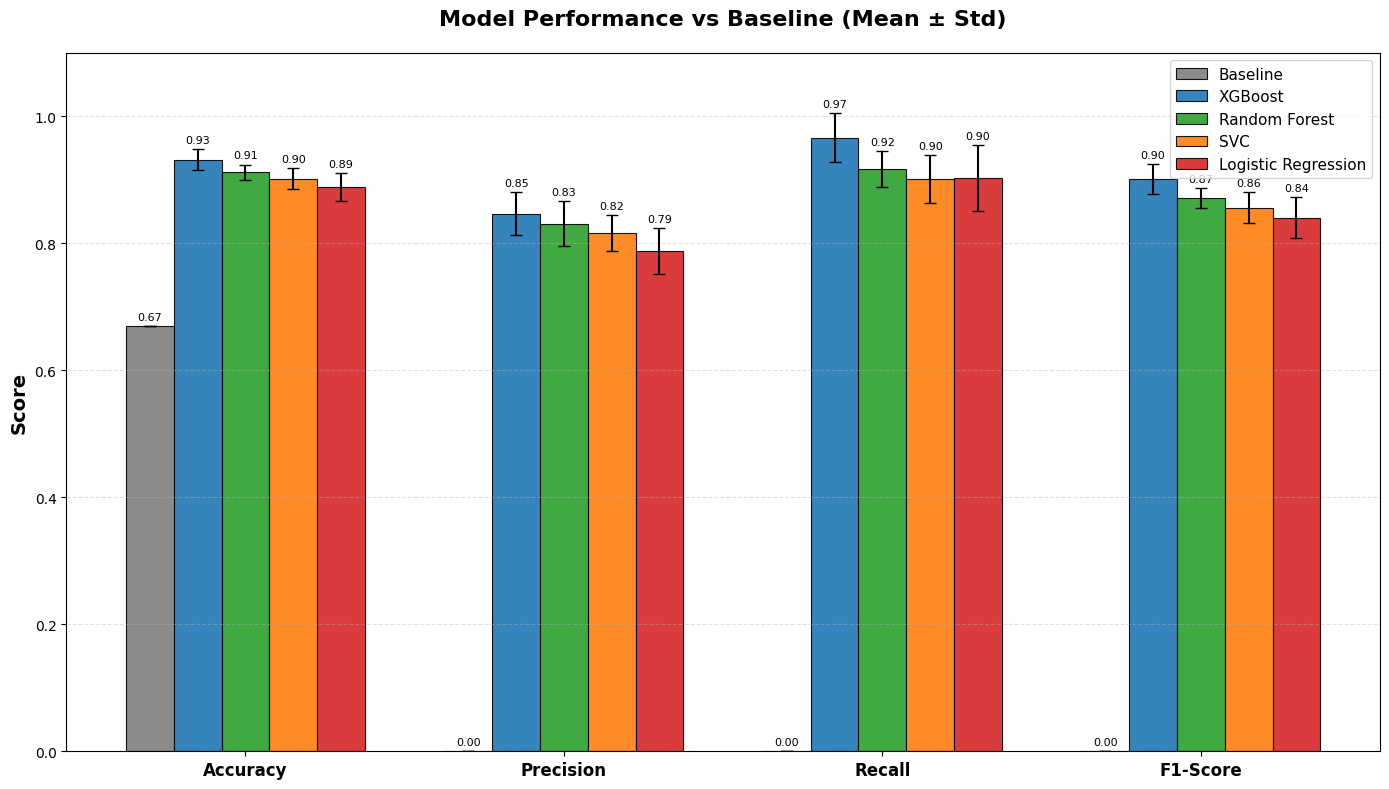

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare Data (Baseline added)
models = ['Baseline', 'XGBoost', 'Random Forest', 'SVC', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Mean Scores
means = {
    'Baseline': [0.67, 0.0, 0.0, 0.0],
    'XGBoost': [0.9315, 0.8468, 0.9662, 0.9017],
    'Random Forest': [0.9115, 0.8311, 0.9169, 0.8709],
    'SVC': [0.9015, 0.8160, 0.9015, 0.8560],
    'Logistic Regression': [0.8885, 0.7874, 0.9031, 0.8402]
}

# Standard Deviations (Std)
stds = {
    'Baseline': [0.0, 0.0, 0.0, 0.0],
    'XGBoost': [0.0164, 0.0339, 0.0382, 0.0236],
    'Random Forest': [0.0125, 0.0356, 0.0285, 0.0158],
    'SVC': [0.0164, 0.0286, 0.0378, 0.0243],
    'Logistic Regression': [0.0224, 0.0364, 0.0520, 0.0323]
}

# Plot Settings
x = np.arange(len(metrics))
width = 0.15
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#7f7f7f', '#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
# Grey (Base), Blue (XGB), Green (RF), Orange (SVC), Red (LogReg)

# Plot bars for each model
for i, model in enumerate(models):
    offset = width * i
    pos = x - (width * 2.0) + offset
    rects = ax.bar(pos, means[model], width,
                   yerr=stds[model],
                   label=model,
                   color=colors[i],
                   capsize=4,
                   alpha=0.9,
                   edgecolor='black',
                   linewidth=0.8)

    ax.bar_label(rects, padding=3, fmt='%.2f', fontsize=8)

# Create the Chart
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Model Performance vs Baseline (Mean ± Std)', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12, fontweight='bold')
ax.legend(fontsize=11, loc='upper right')

ax.set_ylim(0.0, 1.1)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('model_comparison_with_baseline.png', dpi=300)
plt.show()

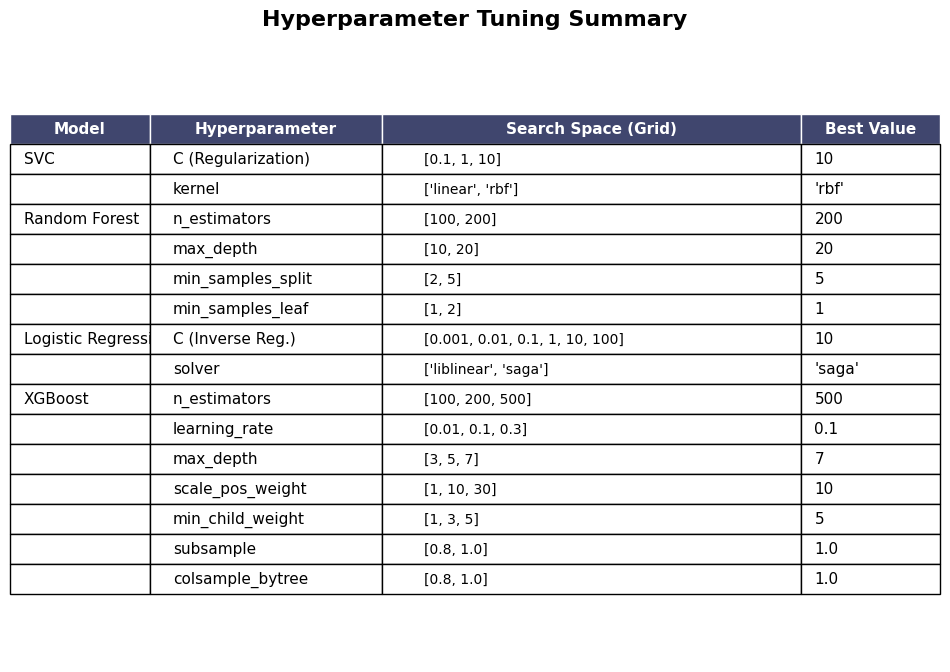

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Prepare Data
data = [
    # SVC
    ["SVC", "C (Regularization)", "[0.1, 1, 10]", "10"],
    ["", "kernel", "['linear', 'rbf']", "'rbf'"],

    # Random Forest
    ["Random Forest", "n_estimators", "[100, 200]", "200"],
    ["", "max_depth", "[10, 20]", "20"],
    ["", "min_samples_split", "[2, 5]", "5"],
    ["", "min_samples_leaf", "[1, 2]", "1"],

    # Logistic Regression
    ["Logistic Regression", "C (Inverse Reg.)", "[0.001, 0.01, 0.1, 1, 10, 100]", "10"],
    ["", "solver", "['liblinear', 'saga']", "'saga'"],

    # XGBoost
    ["XGBoost", "n_estimators", "[100, 200, 500]", "500"],
    ["", "learning_rate", "[0.01, 0.1, 0.3]", "0.1"],
    ["", "max_depth", "[3, 5, 7]", "7"],
    ["", "scale_pos_weight", "[1, 10, 30]", "10"],
    ["", "min_child_weight", "[1, 3, 5]", "5"],
    ["", "subsample", "[0.8, 1.0]", "1.0"],
    ["", "colsample_bytree", "[0.8, 1.0]", "1.0"],
]

columns = ["Model", "Hyperparameter", "Search Space (Grid)", "Best Value"]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# 2. Plot Settings
fig, ax = plt.subplots(figsize=(12, 8)) # Adjust figure size
ax.axis('off') # Hide axes

# 3. Create Table
# cellLoc='left' aligns text to the left for a cleaner look
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='left')

# 4. Style the Table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 1.8) # Adjust row height (width, height)

# Set column widths
# Model: 0.15, Hyperparam: 0.25, Grid: 0.45, Best: 0.15
col_widths = [0.15, 0.25, 0.45, 0.15]
for i, width in enumerate(col_widths):
    for key, cell in table.get_celld().items():
        if key[1] == i:
            cell.set_width(width)

# Set header color and bold font
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e') # Dark blue header
        cell.set_edgecolor('white')
    else:
        # Add alternating background colors for different models for readability
        # Logic: If the 'Model' column contains text, it indicates the start of a new model block
        if df.iloc[row-1, 0] != "":
            cell.set_edgecolor('black')

        # Make 'Grid' column font slightly smaller to prevent overflow
        if col == 2:
             cell.set_text_props(size=10)

# 5. Save Image
plt.title('Hyperparameter Tuning Summary', fontsize=16, weight='bold', y=1.02)
plt.savefig('hyperparameter_summary.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()